In [ ]:
import os
from tqdm import tqdm
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import shutil
from matplotlib import pyplot as plt
import matplotlib.cm as cm

import tensorflow as tf

import pickle
from tensorflow.keras import datasets, layers, models, applications
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#import splitfolders

## 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
label_names = os.listdir('/content/drive/MyDrive/이미지 분류 프로젝트(주은, 준석, 기훈)/data')
# label2index, index2label 딕셔너리 생성
label2index = {}
index2label = {}
i = 0
for label in label_names:
    label2index[label] = i
    index2label[i] = label
    i += 1

print(label2index)
print(index2label)

{'10000000_18': 0, '10000000_16': 1, '10000000_8': 2, '10000000_4': 3, '18000000_0': 4, '10000000_1': 5, '10000000_0': 6, '18000000_2': 7, '18000000_1': 8, '18000000_3': 9, '18000000_4': 10, '18000000_5': 11, '16000000_1': 12, '10000000_17': 13, '10000000_15': 14, '10000000_14': 15, '16000000_0': 16, '18000000_6': 17, '16000000_12': 18, '16000000_16': 19, '16000000_4': 20, '18000000_7': 21, '18000000_9': 22, '18000000_8': 23, '18000000_10': 24, '18000000_11': 25, '18000000_12': 26, '18000000_13': 27, '18000000_14': 28, '18000000_15': 29, '18000000_16': 30, '18000000_17': 31, '18000000_18': 32, '18000000_19': 33, '12000000_0': 34, '12000000_1': 35, '12000000_2': 36, '12000000_3': 37, '12000000_5': 38, '12000000_4': 39, '12000000_8': 40, '12000000_7': 41, '12000000_6': 42, '12000000_9': 43, '12000000_10': 44, '12000000_11': 45, '12000000_12': 46, '12000000_13': 47, '12000000_14': 48, '12000000_15': 49, '12000000_16': 50, '12000000_17': 51, '12000000_18': 52, '12000000_19': 53}
{0: '10000

In [ ]:
# 이미지 불러오기
with open('/content/drive/MyDrive/이미지 분류 프로젝트(주은, 준석, 기훈)/output/x_train.pickle', 'rb') as f1:
    x_train = pickle.load(f1)
with open('/content/drive/MyDrive/이미지 분류 프로젝트(주은, 준석, 기훈)/output/x_test.pickle', 'rb') as f2:
    x_test = pickle.load(f2)
with open('/content/drive/MyDrive/이미지 분류 프로젝트(주은, 준석, 기훈)/output/x_val.pickle', 'rb') as f3:
    x_val = pickle.load(f3)
with open('/content/drive/MyDrive/이미지 분류 프로젝트(주은, 준석, 기훈)/output/x_real_test.pickle', 'rb') as f4:
    x_real_test = pickle.load(f4)

# 라벨 불러오기
with open('/content/drive/MyDrive/이미지 분류 프로젝트(주은, 준석, 기훈)/output/train_labels.pickle', 'rb') as f1:
    y_train = pickle.load(f1)
with open('/content/drive/MyDrive/이미지 분류 프로젝트(주은, 준석, 기훈)/output/test_labels.pickle', 'rb') as f2:
    y_test = pickle.load(f2)
with open('/content/drive/MyDrive/이미지 분류 프로젝트(주은, 준석, 기훈)/output/val_labels.pickle', 'rb') as f3:
    y_val = pickle.load(f3)

In [ ]:
x_real_test.shape

(3, 144, 144, 3)

## 1. Alexnet

In [ ]:
# model_alexnet = tf.keras.Sequential()

# model_alexnet.add(layers.Conv2D(48, (11, 11), strides=4, activation = 'relu', input_shape = (144, 144, 3)))
# model_alexnet.add(layers.Lambda(tf.nn.local_response_normalization))
# model_alexnet.add(layers.MaxPooling2D((3, 3), strides=2))

# model_alexnet.add(layers.Conv2D(128, (5, 5), strides = 1, padding='same', activation = 'relu'))
# model_alexnet.add(layers.Lambda(tf.nn.local_response_normalization))
# model_alexnet.add(layers.MaxPooling2D((3, 3), strides=2))

# model_alexnet.add(layers.Conv2D(192, (3, 3), padding='same', activation = 'relu'))
# model_alexnet.add(layers.Conv2D(192, (3, 3), padding='same', activation = 'relu'))
# model_alexnet.add(layers.Conv2D(128, (3, 3), padding='same', activation = 'relu'))
# model_alexnet.add(layers.MaxPooling2D((3, 3), strides=2))

# model_alexnet.add(layers.Flatten())
# model_alexnet.add(layers.Dense(256, activation = 'relu'))
# model_alexnet.add(layers.Dense(128, activation = 'relu'))
# model_alexnet.add(layers.Dense(len(label_names), activation = 'softmax'))

# alex_checkpoint_path = '/content/drive/MyDrive/이미지 분류 프로젝트(주은, 준석, 기훈)/result/Alexnet/training_3' # /cp.ckpt.data-00000-of-00001

In [ ]:
# latest = tf.train.latest_checkpoint(alex_checkpoint_path)
# model_alexnet.load_weights(latest)

# alexnet_pred = model_alexnet.predict(x_test)
# label_test = np.argmax(y_test, axis=1)
# accuracy_score(np.argmax(alexnet_pred, axis = 1), label_test)

In [ ]:
# alexnet_top3_acc = tf.keras.metrics.TopKCategoricalAccuracy(k=3)
# alexnet_top3_acc.update_state(y_test, alexnet_pred)
# print("Top-3 Accuracy:", alexnet_top3_acc.result().numpy())

### 2. Mobilenet_Large

In [ ]:
mobilenet = applications.MobileNetV3Large(include_top=False, input_shape = (144 ,144 ,3), weights = 'imagenet')

# model.Sequential()없이 모델 구축하는 방법
inputs = tf.keras.Input(shape=(144 ,144 ,3))

x = mobilenet(inputs, training=False)
x = tf.keras.layers.Flatten(input_shape=mobilenet.output_shape[1:])(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
# x= tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
# x= tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(len(label_names), activation='softmax')(x)

mobilenet_model = tf.keras.Model(inputs, outputs)

mobilenet_checkpoint_path = '/content/drive/MyDrive/이미지 분류 프로젝트(주은, 준석, 기훈)/result/Mobilenet/training_2'

12683000/12683000 [==============================] - 1s 0us/step


In [ ]:
latest = tf.train.latest_checkpoint(mobilenet_checkpoint_path)
mobilenet_model.load_weights(latest)

mobilenet_pred = mobilenet_model.predict(x_test)
label_test = np.argmax(y_test, axis=1)
accuracy_score(np.argmax(mobilenet_pred, axis = 1), label_test)

295/295 [==============================] - 19s 21ms/step


0.7150588984399873

In [ ]:
mobilenet_top3_acc = tf.keras.metrics.TopKCategoricalAccuracy(k=3)
mobilenet_top3_acc.update_state(y_test, mobilenet_pred)
print("Top-3 Accuracy:", mobilenet_top3_acc.result().numpy())

Top-3 Accuracy: 0.8961053


## 3. VGG19

In [ ]:
#import vgg19
vgg19 = applications.VGG19(include_top=False, weights='imagenet', input_shape = (144 ,144 ,3))

# model.Sequential()없이 모델 구축하는 방법
inputs = tf.keras.Input(shape=(144 ,144 ,3))

x = vgg19(inputs, training=False)
x = tf.keras.layers.Flatten(input_shape=vgg19.output_shape[1:])(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
outputs = tf.keras.layers.Dense(len(label_names), activation='softmax')(x)

model_vgg19 = tf.keras.Model(inputs, outputs)

vgg19_checkpoint_path = '/content/drive/MyDrive/이미지 분류 프로젝트(주은, 준석, 기훈)/result/vgg19/training_2'

80134624/80134624 [==============================] - 2s 0us/step


In [ ]:
latest = tf.train.latest_checkpoint(vgg19_checkpoint_path)
model_vgg19.load_weights(latest)

vgg19_pred = model_vgg19.predict(x_test)
label_test = np.argmax(y_test, axis=1)
accuracy_score(np.argmax(vgg19_pred, axis = 1), label_test)

295/295 [==============================] - 21s 63ms/step


0.4975061020906293

In [ ]:
vgg19_top3_acc = tf.keras.metrics.TopKCategoricalAccuracy(k=3)
vgg19_top3_acc.update_state(y_test, vgg19_pred)
print("Top-3 Accuracy:", vgg19_top3_acc.result().numpy())

Top-3 Accuracy: 0.74052846


## 4. ResNet50

In [ ]:
resnet_v1 = ResNet50(include_top=False, input_shape = (144 ,144 ,3), weights = 'imagenet')

# model.Sequential()없이 모델 구축하는 방법
inputs = tf.keras.Input(shape=(144 ,144 ,3))

x = resnet_v1(inputs, training=False)
x = tf.keras.layers.Flatten(input_shape=resnet_v1.output_shape[1:])(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
outputs = tf.keras.layers.Dense(len(label_names), activation='softmax')(x)

model_resnet = tf.keras.Model(inputs, outputs)

resnet_checkpoint_path = '/content/drive/MyDrive/이미지 분류 프로젝트(주은, 준석, 기훈)/training_2/result/ResNet'

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
latest = tf.train.latest_checkpoint(resnet_checkpoint_path)
model_resnet.load_weights(latest)

resnet_pred = model_resnet.predict(x_test)
label_test = np.argmax(y_test, axis=1)
accuracy_score(np.argmax(resnet_pred, axis = 1), label_test)

295/295 [==============================] - 14s 42ms/step


0.7173936113764194

In [ ]:
resnet_top3_acc = tf.keras.metrics.TopKCategoricalAccuracy(k=3)
resnet_top3_acc.update_state(y_test, resnet_pred)
print("Top-3 Accuracy:", resnet_top3_acc.result().numpy())

Top-3 Accuracy: 0.90544415


#### Pred_ensemble

In [ ]:
ensemble_pred = np.mean([mobilenet_pred, vgg19_pred, resnet_pred], axis=0)
label_test = np.argmax(y_test, axis=1)
accuracy_score(np.argmax(ensemble_pred, axis = 1), label_test)

0.7444550567759737

In [ ]:
ensemble_top3_acc = tf.keras.metrics.TopKCategoricalAccuracy(k=3)
ensemble_top3_acc.update_state(y_test, ensemble_pred)
print("Top-3 Accuracy:", ensemble_top3_acc.result().numpy())

Top-3 Accuracy: 0.9024727


#### Inference

In [ ]:
#파일 불러오기
with open('/content/drive/MyDrive/이미지 분류 프로젝트(주은, 준석, 기훈)/urls_dic.pickle', 'rb') as handle:
    urls_dic=pickle.load(handle)

In [ ]:
img_path = '/content/drive/MyDrive/이미지 분류 프로젝트(주은, 준석, 기훈)/test_img'
test_imgs = []

for label in os.listdir(img_path):
    test_imgs.append(img_path+'/'+label)

1/1 [==============================] - 0s 65ms/step


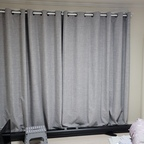

18000000_7
https://ohou.se/productions/169814/selling
18000000_4
https://ohou.se/productions/264565/selling
18000000_13
https://ohou.se/productions/540903/selling
1/1 [==============================] - 0s 47ms/step


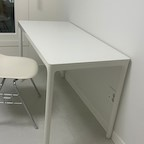

10000000_14
https://ohou.se/productions/170039/selling
12000000_19
https://ohou.se/productions/858047/selling
12000000_1
https://ohou.se/productions/424239/selling
1/1 [==============================] - 0s 76ms/step


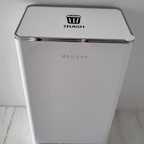

12000000_1
https://ohou.se/productions/424239/selling
12000000_7
https://ohou.se/productions/1085498/selling
12000000_4
https://ohou.se/productions/1384503/selling


In [ ]:
for img, real_test in zip(test_imgs, x_real_test):
    ex_mobilenet_pred = mobilenet_model.predict(real_test.reshape(1, 144, 144, 3))
    ex_vgg19_pred = model_vgg19.predict(real_test.reshape(1, 144, 144, 3))
    ex_resnet_pred = model_resnet.predict(real_test.reshape(1, 144, 144, 3))
    ex_ensemble_pred = np.mean([ex_mobilenet_pred, ex_vgg19_pred, ex_resnet_pred], axis=0)
    top3_classes = np.argsort(-ex_ensemble_pred)[:, :3]
    for classes in top3_classes:
        image = cv2.imread(img)
        cv2_imshow(image)
        for i in classes:
            print(index2label[i])
            print(urls_dic[index2label[i].split('_')[0]][int(index2label[i].split('_')[1])])